# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# URL Address
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination that are in OpenWeatherData
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    request_url = url + "appid=" + api_key + "&q=" + city
    response = requests.get(request_url)
    
    # If the city is unique and city is in OpenWeatherMap, then add it to a our cities list
    if (city not in cities) & (response.status_code != 404):
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

520

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# URL Address
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

# Set up lists to hold variables
cloudiness = []
countries = []
current_date = []
hum = []
latitude = []
longitude = []
temperatures = []
windsp = []

# Counter for cities
count = 1
n = len(cities)

print("Beginning Data Retrieval")
print("-----------------------------------")

# Loop through cities
for city in cities:
    
    time.sleep(1)
    
    # Build query URL based on current element in units
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit

    # Request JSON
    response = requests.get(query_url)
    response_json = response.json()
    
    # Get desired weather data from JSON z
    clouds = response_json["clouds"]["all"]
    country = response_json["sys"]["country"]
    date = response_json["dt"]
    humidity = response_json["main"]["humidity"]
    lat = response_json["coord"]["lat"]
    lng = response_json["coord"]["lon"]
    max_temp = response_json["main"]["temp_max"]
    wind_speed = response_json["wind"]["speed"]

    # Append weather data for each city to their respective lists
    cloudiness.append(clouds)
    countries.append(country)
    current_date.append(date)
    hum.append(humidity)
    latitude.append(lat)
    longitude.append(lng)
    temperatures.append(max_temp)
    windsp.append(wind_speed)

    # Print log of each city
    print(f'Processing City number {count} of {n}: {city}')
    count += 1

print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")
    

Beginning Data Retrieval
-----------------------------------
Processing City number 1 of 520: paamiut
Processing City number 2 of 520: sinor
Processing City number 3 of 520: ushuaia
Processing City number 4 of 520: viedma
Processing City number 5 of 520: sitka
Processing City number 6 of 520: kapaa
Processing City number 7 of 520: new norfolk
Processing City number 8 of 520: arraial do cabo
Processing City number 9 of 520: xuddur
Processing City number 10 of 520: rikitea
Processing City number 11 of 520: vaini
Processing City number 12 of 520: maningrida
Processing City number 13 of 520: gao
Processing City number 14 of 520: albany
Processing City number 15 of 520: atuona
Processing City number 16 of 520: salalah
Processing City number 17 of 520: ternate
Processing City number 18 of 520: baherden
Processing City number 19 of 520: chokurdakh
Processing City number 20 of 520: hermanus
Processing City number 21 of 520: neuquen
Processing City number 22 of 520: angoche
Processing City numb

Processing City number 188 of 520: khorixas
Processing City number 189 of 520: sikonge
Processing City number 190 of 520: kerman
Processing City number 191 of 520: brive-la-gaillarde
Processing City number 192 of 520: belaya gora
Processing City number 193 of 520: padang
Processing City number 194 of 520: neiafu
Processing City number 195 of 520: le port
Processing City number 196 of 520: zhanaozen
Processing City number 197 of 520: taksimo
Processing City number 198 of 520: yar-sale
Processing City number 199 of 520: port hedland
Processing City number 200 of 520: nantucket
Processing City number 201 of 520: georgetown
Processing City number 202 of 520: outjo
Processing City number 203 of 520: nevelsk
Processing City number 204 of 520: dongsheng
Processing City number 205 of 520: victoria
Processing City number 206 of 520: sampit
Processing City number 207 of 520: zharkent
Processing City number 208 of 520: fairbanks
Processing City number 209 of 520: acapulco
Processing City number 2

Processing City number 373 of 520: polson
Processing City number 374 of 520: albi
Processing City number 375 of 520: deputatskiy
Processing City number 376 of 520: yeppoon
Processing City number 377 of 520: harper
Processing City number 378 of 520: north bend
Processing City number 379 of 520: houma
Processing City number 380 of 520: porto seguro
Processing City number 381 of 520: monticello
Processing City number 382 of 520: slave lake
Processing City number 383 of 520: tres arroyos
Processing City number 384 of 520: upington
Processing City number 385 of 520: grua
Processing City number 386 of 520: terney
Processing City number 387 of 520: unai
Processing City number 388 of 520: ust-kulom
Processing City number 389 of 520: abu dhabi
Processing City number 390 of 520: khani
Processing City number 391 of 520: deqing
Processing City number 392 of 520: wajima
Processing City number 393 of 520: yatou
Processing City number 394 of 520: balikpapan
Processing City number 395 of 520: sola
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
# Create a data frame from cities
weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": current_date,
    "Humidity": hum,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temperatures,
    "Wind Speed": windsp
}
df = pd.DataFrame(weather_dict)

# View data
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,paamiut,100,GL,1563410569,94,61.99,-49.67,42.72,26.11
1,sinor,20,IN,1563411158,79,21.91,73.34,84.20,9.17
2,ushuaia,75,AR,1563411159,52,-54.81,-68.31,41.00,17.22
3,viedma,100,AR,1563411160,51,-40.81,-62.99,60.00,20.38
4,sitka,4,US,1563411161,36,37.17,-99.65,96.01,13.00


In [81]:
# Identify number of observations per column
df.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

In [82]:
# Summary Stastics
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000
mean,49.125000,1.563411e+09,72.161538,21.382846,17.452731,68.176942,7.495192
std,37.909101,2.003214e+02,20.053610,33.291980,89.716395,13.260005,5.120117
min,0.000000,1.563411e+09,10.000000,-54.810000,-179.170000,33.000000,0.380000
25%,6.000000,1.563411e+09,59.750000,-5.240000,-60.377500,58.012500,3.620000
50%,50.000000,1.563411e+09,77.000000,24.345000,19.890000,69.800000,6.120000
75%,84.250000,1.563412e+09,88.000000,49.795000,100.345000,77.640000,10.340000
max,100.000000,1.563412e+09,100.000000,78.220000,177.510000,107.600000,31.790000


In [54]:
# Export city data into a .csv
df.to_csv("City_Weather_Data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

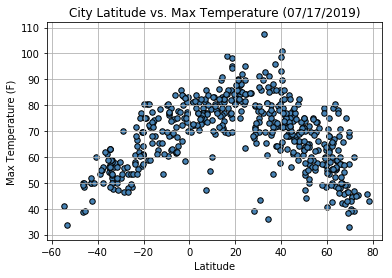

In [89]:
# Scatter plot 
fig, ax = plt.subplots()
df.plot(kind='scatter', x='Lat', y='Max Temp', ylim=((28, 112)), xlim=((-62, 84)), s=30,
        ax=ax, color="steelblue", linewidths=1, edgecolor='black')

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Max Temperature (07/17/2019)")
ax.set_xlabel('Latitude', size=10)
ax.set_ylabel('Max Temperature (F)', size=10)

# Add grid
plt.grid()

# Save Figure
plt.savefig('Scatter_MaxTemp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

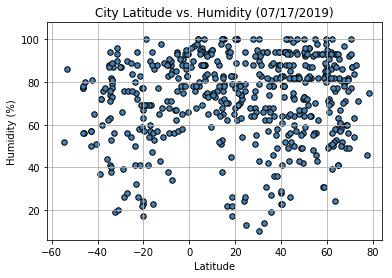

In [92]:
# Scatter plot 
fig, ax = plt.subplots()
df.plot(kind='scatter', x='Lat', y='Humidity', ylim=((6, 108)), xlim=((-62, 84)), s=30,
        ax=ax, color="steelblue", linewidths=1, edgecolor='black')

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Humidity (07/17/2019)")
ax.set_xlabel('Latitude', size=10)
ax.set_ylabel('Humidity (%)', size=10)

# Add grid
plt.grid()

# Save Figure
plt.savefig('Scatter_Humidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

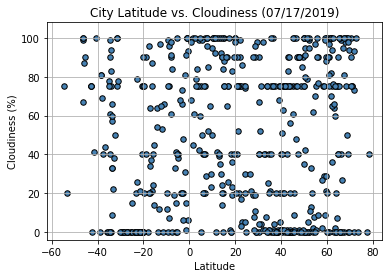

In [85]:
# Scatter plot 
fig, ax = plt.subplots()
df.plot(kind='scatter', x='Lat', y='Cloudiness', ylim=((-4, 108)), xlim=((-62, 84)), s=30,
        ax=ax, color="steelblue", linewidths=1, edgecolor='black')

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Cloudiness (07/17/2019)")
ax.set_xlabel('Latitude', size=10)
ax.set_ylabel('Cloudiness (%)', size=10)

# Add grid
plt.grid()

# Save Figure
plt.savefig('Scatter_Cloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

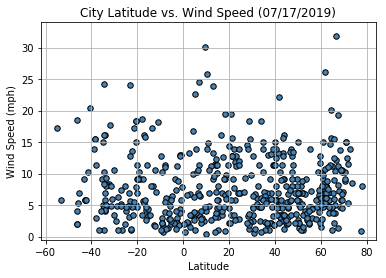

In [88]:
# Scatter plot 
fig, ax = plt.subplots()
df.plot(kind='scatter', x='Lat', y='Wind Speed', ylim=((-0.5, 34)), xlim=((-62, 84)), s=30,
        ax=ax, color="steelblue", linewidths=1, edgecolor='black')

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Wind Speed (07/17/2019)")
ax.set_xlabel('Latitude', size=10)
ax.set_ylabel('Wind Speed (mph)', size=10)

# Add grid
plt.grid()

# Save Figure
plt.savefig('Scatter_WindSpeed.png')

# Show plot
plt.show()